<a href="https://colab.research.google.com/github/kuiper2000/ipynb-examples/blob/master/Tornado_obs_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install netcdf4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from netCDF4 import Dataset as NetCDFFile
import random 
import timeit
import pickle
from scipy import stats
import pandas as pd 
# mount google drive 
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
lat   = np.arange(-90,91,1)
lon   = np.arange(0,360,1)
xx,yy = np.meshgrid(lon,lat)
np.shape(xx)

#dates = pd.date_range('1950-01-01', '2017-12-31', freq='M')
#np.shape(dates)

(181, 360)

In [ ]:
f        = open("/content/gdrive/My Drive/Colab/2020_research//Seasonal_tornado_forecast/hazard_csv/list_csv.txt", "r")
import csv
year    = 1950
tornado = np.zeros((816,181,360))
hail    = np.zeros((816,181,360))
thunder = np.zeros((816,181,360))
flash_flood = np.zeros((816,181,360))
count   = 0
for i, line in enumerate(f):
    filename  = str(line)
    filename  = filename.rstrip("\n")
    if i==(year-1950):
    #if i==0:
       for month in np.arange(1,13,1):  
           with open('/content/gdrive/My Drive/Colab/2020_research//Seasonal_tornado_forecast/hazard_csv/'+filename) as csvfile:
                readCSV = csv.reader(csvfile, delimiter=',')
                for row in readCSV:
                    if (row[0]==(str(year)+str(month).zfill(2))) & (row[12]=='Tornado') & (row[44]!=''):
                       print((str(year)+str(month).zfill(2)))
                       for y in np.arange(110,160):
                           for x in np.arange(230,300):
                               if (float(row[44])>= lat[y]-0.5) & (float(row[44])< lat[y+1]+0.5) & (float(row[45])+360>= lon[x]-0.5) & (float(row[45])+360< lon[x+1]+0.5):
                                  tornado[count,y,x] = tornado[count,y,x]+1
                                  #print('Date='+row[0]+' Lat='+row[44]+' Lon='+str(360+float(row[45])) )
                    elif (row[0]==(str(year)+str(month).zfill(2))) & (row[12]=='Hail') & (row[44]!=''):
                       for y in np.arange(110,160):
                           for x in np.arange(230,300):
                               if (float(row[44])>= lat[y]-0.5) & (float(row[44])< lat[y+1]+0.5) & (float(row[45])+360>= lon[x]-0.5) & (float(row[45])+360< lon[x+1]+0.5):
                                  hail[count,y,x] = hail[count,y,x]+1
                                  #print('Date='+row[0]+' Lat='+row[44]+' Lon='+str(360+float(row[45])) )
           count=count+1
    np.savez('/content/gdrive/My Drive/Colab/2020_research//Seasonal_tornado_forecast/grid_data.npz',tornado=tornado,hail=hail)       
    year=year+1

Text(0.5, 0, 'Months since 1950')

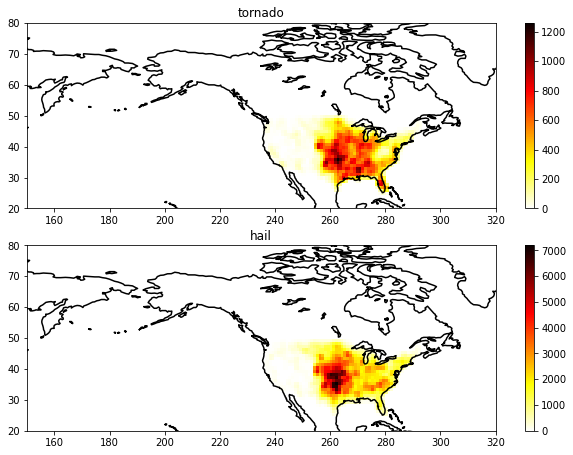

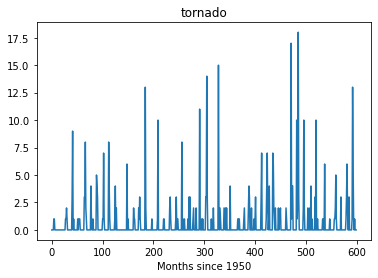

In [ ]:
f = open("/content/gdrive/My Drive/2019_research/Tensor_flow_turtorial/lat.bin", "r")
costal_lat = np.fromfile(f, np.float32)

f = open("/content/gdrive/My Drive/2019_research/Tensor_flow_turtorial/lon.bin", "r")
costal_lon = np.fromfile(f, np.float32)

fig=plt.figure()
plt.subplot(2,1,1)
cs=plt.pcolor(xx+0.5,yy+0.5,tornado[0:816,:,:].sum(axis=0),cmap='hot_r')
plt.plot(costal_lon,costal_lat,'k')
plt.ylim(20, 80)
plt.xlim(150, 320)
plt.colorbar(cs)
plt.title('tornado')

plt.subplot(2,1,2)
cs=plt.pcolor(xx,yy,hail[0:816,:,:].sum(axis=0),cmap='hot_r')
plt.plot(costal_lon,costal_lat,'k')
plt.ylim(20, 80)
plt.xlim(150, 320)
plt.colorbar(cs)
plt.title('hail')
fig.set_size_inches(10.5, 7.5)

fig=plt.figure()
plt.plot(tornado[0:600,130,260])
plt.title('tornado')
plt.xlabel('Months since 1950')



In [ ]:
dates   = pd.date_range('1950-01-01', '2017-12-31', freq='M')
data    = np.load('/content/gdrive/My Drive/Colab/2020_research//Seasonal_tornado_forecast/grid_data.npz')
tornado = data['tornado']
hail    = data['hail']
posi_y,posi_x = np.where((xx>250) & (xx<270) & (yy>30) & (yy<50))
tornado_mean  = (tornado[:,posi_y,posi_x].sum(axis=1))
hail_mean     = (hail[:,posi_y,posi_x].sum(axis=1))

In [ ]:
monthly_climatology_tornado = np.zeros((12,))
monthly_climatology_hail = np.zeros((12,))
for i in range(0,12):
    posi = np.where(dates.month==(i+1))
    monthly_climatology_tornado[i,] = tornado_mean[posi].mean(axis=0)
    monthly_climatology_hail[i,]    = hail_mean[posi].mean(axis=0)

<BarContainer object of 12 artists>

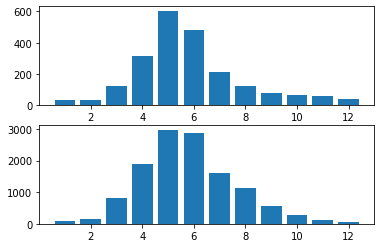

In [ ]:
x=np.arange(1,13,1)
plt.figure()
plt.subplot(2,1,1)
plt.bar(x,monthly_climatology_tornado)
plt.subplot(2,1,2)
plt.bar(x,monthly_climatology_hail)